In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
x,y=datasets.make_classification(n_samples=100,n_features=5,)

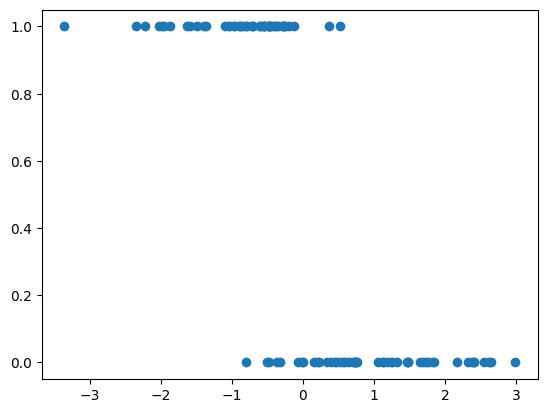

In [4]:
plt.scatter(x[:,0],y)

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def fit(data,target):
    n_sample,n_feature=data.shape
    
    weights = np.zeros(n_feature)   # assign weights to zero
    bias=0           #assign bias/intercept to zero
    
    l_rate=0.01
    
    for i in range(1000):
        linear_model = np.dot(data,weights) + bias    # y' = W.X + b  ;where W=[w1,w2,w3,...,wn] and X=[x1,x2,x3,...,xn]
        
        ypred = sigmoid(linear_model)  #ypred = 1/{1+e^(-y')}
        
        #cost function = (1/n) sigma{(y- ypred)^2} = (1/n) sigma[(y-1/{1+e^(-z)})]  ;where z = W.X + b
                                                                        # and W=[w1,w2,w3,...,wn] and X=[x1,x2,x3,...,xn]
        
        dw = np.dot(data.T,(ypred-target))*(2/n_sample)  #  dw = derivative of cost function wrt W vector 
                                                         #       = (2/n) sigma{(y- ypred)}.W 
        
        db = np.sum(ypred-target)*(2/n_sample)           #  db = derivative of cost function wrt b  
                                                         #      = (2/n) sigma{(y- ypred)} 
        
        weights -= l_rate*dw    # new_wt = old_wt - learning rate * dw ; neagtive sign for opposite direction of steepest 
        
        bias -= l_rate*db    # new_b = old_b - learning rate * db ; neagtive sign for opposite direction of steepest 
    
    return weights,bias

def predict(data,weights,bias):
    linear = np.dot(data,weights) + bias  # linear  = W.X + b  ;where W=[w1,w2,w3,...,wn] and X=[x1,x2,x3,...,xn]
    ypred = sigmoid(linear)               # ypred = 1/{1+e^(-linear')}
    
    return [1 if i>0.5 else 0 for i in ypred]  #if ypred > 0.5 then predicted class is 1 otherwise zero.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
w,b=fit(X_train,y_train)

In [16]:
ypred=predict(X_test,w,b)

In [17]:
accuracy_score(y_test,ypred)

0.9696969696969697

In [18]:
#library

In [21]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()

In [22]:
le.fit(X_train,y_train)
accuracy_score(y_test,le.predict(X_test))

0.9696969696969697